In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [40]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df_train.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


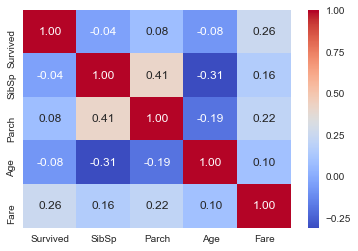

In [44]:
g = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## Date Visualisierung

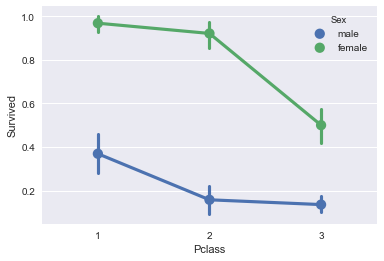

In [45]:
class_gender= sns.pointplot(x='Pclass',y='Survived', hue='Sex', data= df_train )

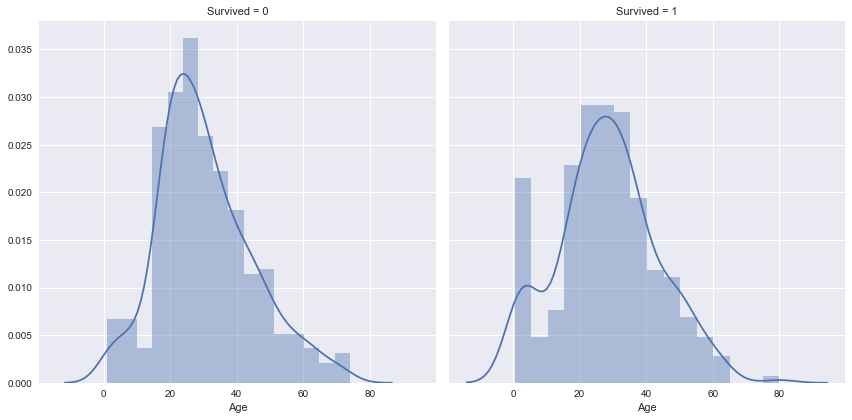

In [46]:
g = sns.FacetGrid(df_train, col='Survived', size=6)
g = g.map(sns.distplot, "Age")

In [47]:
df_train.Age= df_train.Age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Adult', 'Senior']
categories= pd.cut(df_train.Age, bins, labels= group_names)

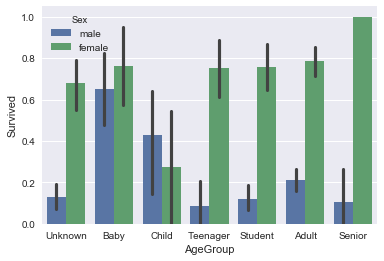

In [48]:
df_train.insert(loc=1,column='AgeGroup', value= categories)
sns.barplot(x='AgeGroup', y='Survived',hue='Sex',data= df_train)

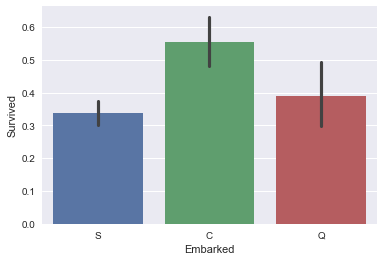

In [49]:
sns.barplot(x="Embarked",y="Survived",data= df_train)

## Data Reinigung

In [50]:
df_train.Cabin= df_train.Cabin.fillna("N")
df_train.Cabin= df_train.Cabin.apply(lambda x: x[0])

In [51]:
df_train= df_train.drop(['Name', 'Ticket'], axis=1)

In [52]:
df_train

,PassengerId,AgeGroup,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,Student,0,3,male,22.0,1,0,7.2500,N,S
1,2,Adult,1,1,female,38.0,1,0,71.2833,C,C
2,3,Adult,1,3,female,26.0,0,0,7.9250,N,S
3,4,Adult,1,1,female,35.0,1,0,53.1000,C,S
4,5,Adult,0,3,male,35.0,0,0,8.0500,N,S
5,6,Unknown,0,3,male,-0.5,0,0,8.4583,N,Q
6,7,Adult,0,1,male,54.0,0,0,51.8625,E,S
7,8,Baby,0,3,male,2.0,3,1,21.0750,N,S
8,9,Adult,1,3,female,27.0,0,2,11.1333,N,S
9,10,Teenager,1,2,female,14.0,1,0,30.0708,N,C


In [53]:
le= preprocessing.LabelEncoder()
le= le.fit(df_train['Cabin'])
df_train['Cabin'] = le.transform(df_train['Cabin'])

In [54]:
df_train.Embarked=df_train.Embarked.str.replace('S','1').replace('C',2).replace('Q',3)

In [55]:
df_train.Embarked.isnull().sum()

2

In [56]:
df_train.Embarked=df_train.Embarked.fillna('2')

In [57]:
df_train.Embarked= df_train.Embarked.astype(int)

In [58]:
df_test.Cabin= df_test.Cabin.fillna("N")
df_test.Cabin= df_test.Cabin.apply(lambda x: x[0])
df_test= df_test.drop(['Name', 'Ticket'], axis=1)
le= preprocessing.LabelEncoder()
le= le.fit(df_test['Cabin'])
df_test['Cabin'] = le.transform(df_test['Cabin'])
df_test.Embarked=df_test.Embarked.str.replace('S','1').replace('C',2).replace('Q',3)
df_test.Embarked=df_test.Embarked.fillna('2')
df_test.Embarked= df_test.Embarked.astype(int)

In [59]:
df_test.Age=df_test.Age.fillna(-0.5)

In [60]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [61]:
df_test.Fare= df_test.Fare.fillna(df_test.Fare.mean())

In [62]:
def encode_features(df):
    features=['Sex','Age','SibSp','Parch','Fare','Cabin']
    for feature in features:
        le= preprocessing.LabelEncoder()
        le= le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

In [63]:
df_train= encode_features(df_train)
df_test = encode_features(df_test)

In [166]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,29,1,0,18,7,1
1,2,1,1,0,52,1,0,207,2,2
2,3,1,3,0,35,0,0,41,7,1
3,4,1,1,0,48,1,0,189,2,1
4,5,0,3,1,48,0,0,43,7,1


In [64]:
from sklearn.model_selection import train_test_split
X_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

num_test=0.2
X_train, X_test,y_train, y_test= train_test_split(X_all, y_all, test_size= num_test, random_state=23)

In [67]:
kfold = StratifiedKFold(n_splits=10)

In [168]:
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.815642458101


In [180]:
X_test = df_test.drop(['PassengerId'], axis=1)

In [181]:
predictions = clf.predict(X_test)

In [188]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,

In [197]:
res= pd.DataFrame(columns=['Survived'], data= predictions, dtype=np.int8)

In [198]:
res.insert(loc=0, column='PassengerId', value= df_test['PassengerId'])

In [201]:
res.to_csv("result.csv",index=False)